<a href="https://colab.research.google.com/github/Masoud0389/Masoud0389/blob/main/Delay_Detection2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#!pwd

In [8]:
dataset = pd.read_csv('drive/MyDrive/Datasets/DS_V_Delay2.csv')

In [32]:
X = dataset.iloc[100000:, :]

In [11]:
#print(X)

# Feature Scaling

In [33]:
from sklearn.utils.sparsefuncs import min_max_axis
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
# Scaling the data to bring all the attributes to a comparable level
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X) 
# Normalizing the data so that 
# the data approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Feature Selection/Reduction

In [34]:
from sklearn.decomposition import PCA
#from sklearn.feature_selection import VarianceThreshold
#Y = VarianceThreshold(threshold=(.0010 * (1 - .0010)))
#X = Y.fit_transform(X)
#print(X)
print(np.shape(X_normalized))
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
#X_principal.columns=['PC1','PC2']
#cdict = {0: 'red', 1: 'blue'}
#X_principal.columns = ['P1', 'P2']


(500000, 330)


In [35]:
#np. set_printoptions(threshold=np. inf)
print(X_principal)
#print(X_principal.head())
#print(np.shape(X_principal))

               0         1
0      -0.408047  0.940377
1      -0.408135  0.940301
2      -0.408135  0.940301
3      -0.408131  0.940311
4      -0.408131  0.940311
...          ...       ...
499995 -0.116928 -0.192831
499996 -0.116928 -0.192831
499997 -0.116928 -0.192830
499998 -0.116928 -0.192830
499999 -0.116928 -0.192830

[500000 rows x 2 columns]


# Plot Test

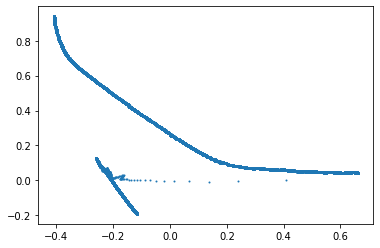

In [36]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], s = 1 , alpha=1)

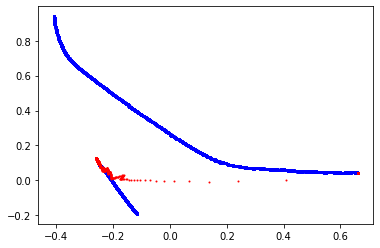

In [37]:
plt.scatter(X_principal.iloc[:200000,0], X_principal.iloc[:200000,1], c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[260000:,0], X_principal.iloc[260000:,1],c = 'b', s = 1 , alpha=1)
plt.scatter(X_principal.iloc[200000:260000,0], X_principal.iloc[200000:260000,1], c = 'r', s = 1 , alpha=1)
plt.show()

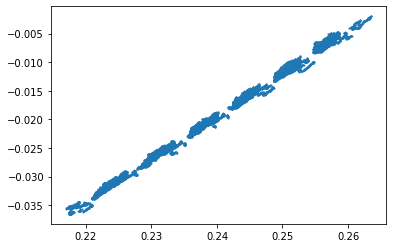

In [25]:

#print(X_principal.iloc[:,0])
plt.scatter(X_principal.iloc[:10000,0], X_principal.iloc[:10000,1], s = 1 , alpha=1)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
plt.show()

# Anomaly Detection

In [74]:
from sklearn.cluster import DBSCAN
# Numpy array of all the cluster labels assigned to each data point
db_default = DBSCAN(eps = 0.001, min_samples = 10).fit_predict(X_principal)

#labels = db_default.labels_

In [70]:
#np. set_printoptions(threshold=np. inf)
#print(np.where(labels == 365))
#print(labels[130000]) ### 120,000 - 260,000

365


In [58]:
#i = np.where(labels == 365)
#i = list(i)
#i = np.transpose(i)
#np. set_printoptions(threshold=np. inf)
#print(np.shape(X_principal))
#print(np.shape(i))
#print(type(X_principal))

(460000, 2)
(339600, 1)
<class 'pandas.core.frame.DataFrame'>


# Visualization

In [ ]:
#plt.scatter(X_principal[labels==365, 0], X_principal[labels==365_, 1], c='r', s=1, label='DBSCAN Outlier')

In [94]:
anom_index = np.where(db_default == 1)
anom_index = np.asarray(anom_index)
print(type(anom_index))
values = X_principal[anom_index]
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1], c = 'b', s = 1 , alpha=1)
plt.scatter(values.iloc[:, 0], values.iloc[:, 1], c = 'r', s = 1 , alpha=1)

plt.show() 

<class 'numpy.ndarray'>


KeyError: ignored